# ***Análise de Risco e Retorno:***

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


In [6]:
!pip install yfinance



In [9]:
import yfinance as yf


In [10]:
# Obtenção de preços históricos usando yfinance
tickers = ["PETR4.SA", "^BVSP"]  # Ação (PETR4) e índice de mercado (IBOVESPA)
data = yf.download(tickers, start="2020-01-01", end="2024-01-01")["Adj Close"]

# Definir os preços como um DataFrame
prices = data.dropna()  # Remover valores nulos, se existirem

# Cálculo de retornos diários
returns = prices.pct_change().dropna()

# Definir retornos da ação e do mercado
asset_returns = returns["PETR4.SA"]
market_returns = returns["^BVSP"]

# Adicionar constante para regressão (CAPM)
X = sm.add_constant(market_returns)
model = sm.OLS(asset_returns, X).fit()

# Resumo dos resultados
print(model.summary())

[*********************100%***********************]  2 of 2 completed

                            OLS Regression Results                            
Dep. Variable:               PETR4.SA   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     1337.
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          6.16e-186
Time:                        20:01:51   Log-Likelihood:                 2481.1
No. Observations:                 992   AIC:                            -4958.
Df Residuals:                     990   BIC:                            -4948.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.001      1.980      0.0

### **2. Portfólios de Markowitz (Fronteira Eficiente):**
PyPortfolioOpt: Implementa a otimização da fronteira eficiente e outras análises relacionadas a portfólios.


Matplotlib/Seaborn: Para gráficos.

In [18]:
!pip install git+https://github.com/robertmartin8/PyPortfolioOpt.git



  Cloning https://github.com/robertmartin8/PyPortfolioOpt.git to /tmp/pip-req-build-o4jy5fd1
  Running command git clone --filter=blob:none --quiet https://github.com/robertmartin8/PyPortfolioOpt.git /tmp/pip-req-build-o4jy5fd1
  Resolved https://github.com/robertmartin8/PyPortfolioOpt.git to commit 65cabcee11d91777d63628744c36869ec64a1c85
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyportfolioopt: filename=pyportfolioopt-1.5.6-py3-none-any.whl size=62705 sha256=280c2bd2f2249d62a0b1a0f0d327c233364afc82693a058b73d4aa4f5e0cfa3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-xmhjcqle/wheels/82/e2/33/c00989e8bf211fc28b66524f439f00af4428d28db1c3bb8dbe
Successfully built pyportfolioopt


In [19]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


In [20]:
# Lista de tickers para download
tickers = ["AAPL", "MSFT", "GOOGL", "^GSPC"]
start_date = "2020-01-01"  # Data de início
end_date = "2024-01-01"    # Data de fim

# Baixar preços ajustados para fechamento
data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]

# Exibir os 5 primeiros registros
print(data.head())

[*********************100%***********************]  4 of 4 completed

Ticker           AAPL      GOOGL        MSFT        ^GSPC
Date                                                     
2020-01-02  72.795990  68.186813  153.938187  3257.850098
2020-01-03  72.088303  67.830109  152.021439  3234.850098
2020-01-06  72.662712  69.638054  152.414352  3246.280029
2020-01-07  72.320984  69.503548  151.024658  3237.179932
2020-01-08  73.484352  69.998253  153.430252  3253.050049


In [21]:
prices = pd.DataFrame(data)

In [22]:
# Calculando retornos esperados e matriz de covariância
mu = mean_historical_return(prices)
S = CovarianceShrinkage(prices).ledoit_wolf()

# Otimização da fronteira eficiente
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()  # Maximiza a razão de Sharpe
cleaned_weights = ef.clean_weights()  # Formata os pesos para legibilidade

# Resultados
print("Pesos do portfólio:")
print(cleaned_weights)

# Desempenho esperado
performance = ef.portfolio_performance(verbose=True)

Pesos do portfólio:
OrderedDict([('AAPL', 0.62286), ('GOOGL', 0.0), ('MSFT', 0.37714), ('^GSPC', 0.0)])
Expected annual return: 26.5%
Annual volatility: 31.3%
Sharpe Ratio: 0.85


# **Visualização:**
Matplotlib/Seaborn: Gráficos detalhados para análises financeiras.


Plotly: Para visualizações interativas.

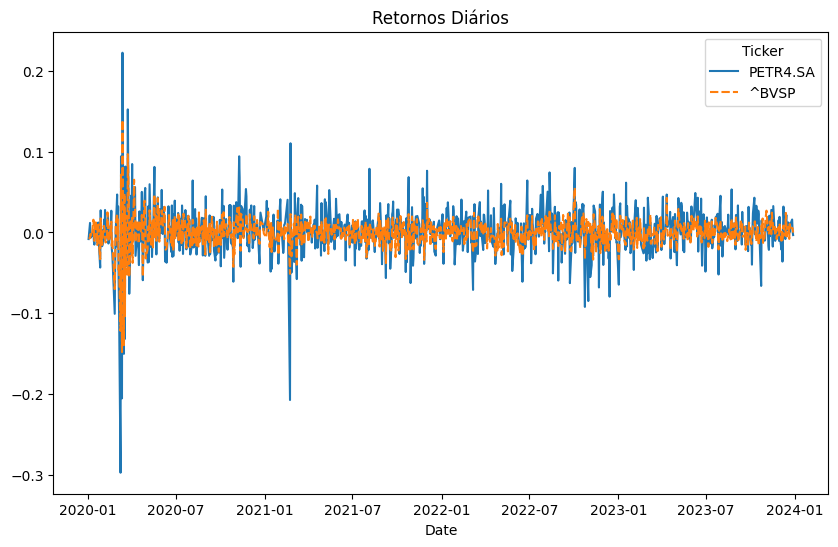

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de retornos
plt.figure(figsize=(10, 6))
sns.lineplot(data=returns)
plt.title("Retornos Diários")
plt.show()


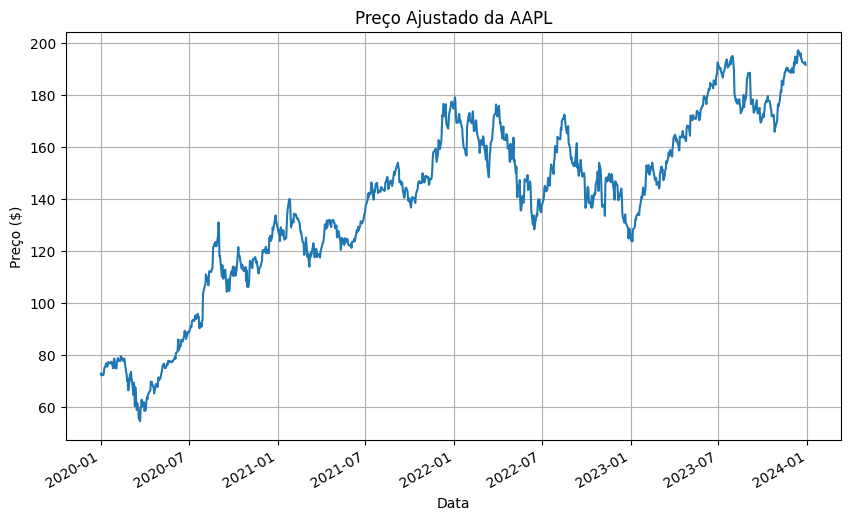

In [24]:
# Plotando preços ajustados ao longo do tempo
data['AAPL'].plot(figsize=(10, 6), title='Preço Ajustado da AAPL', ylabel='Preço ($)', xlabel='Data')
plt.grid()
plt.show()

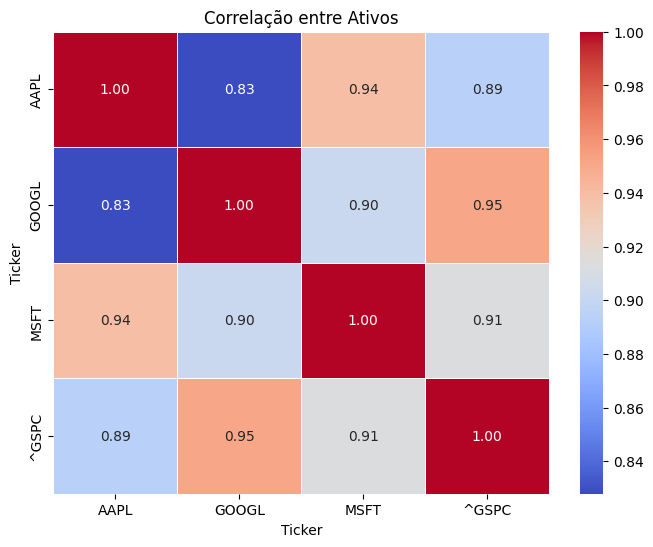

In [25]:
# Calculando a matriz de correlação
correlation_matrix = data.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlação entre Ativos')
plt.show()

In [26]:
import plotly.express as px

# Convertendo dados para o formato longo
data_long = data.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Preço Ajustado')

# Gráfico interativo
fig = px.line(data_long, x='Date', y='Preço Ajustado', color='Ticker',
              title='Preços Ajustados ao Longo do Tempo', labels={'Date': 'Data', 'Preço Ajustado': 'Preço ($)'})
fig.show()

In [28]:
# Calculando os retornos diários
returns = data.pct_change().dropna()

# Gráfico interativo de dispersão
fig = px.scatter(returns, x="AAPL", y="MSFT", title="Correlação entre Retornos: AAPL vs MSFT",
                 labels={'AAPL': 'Retornos da AAPL', 'MSFT': 'Retornos da MSFT'})
fig.show()